##### Import Library and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

##### Data exploration

In [8]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,3.603144,1247,9.025112,1.376,3.036629,24,0.846,0.557674
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,4.066550,1677,10.716637,1.524,3.158664,32,0.882,0.379473
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,3.829175,1467,9.869672,0.831,3.079543,42,0.680,0.465833
11,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,3.958803,1587,10.335824,1.433,3.118595,26,1.364,0.417133
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,3.386677,680,8.444529,1.190,3.195900,29,0.611,0.528205


- จำนวนข้อมูลมีทั้งหมด 20 ตัวโดยแบ่งเป็นข้อมูล 
    - numerical 14 ตัว
    - categorical 6 ตัว
- output ของข้อมูลคือ Attrition_Flag ซึ่งเป็นข้อมูลประเภท categorical

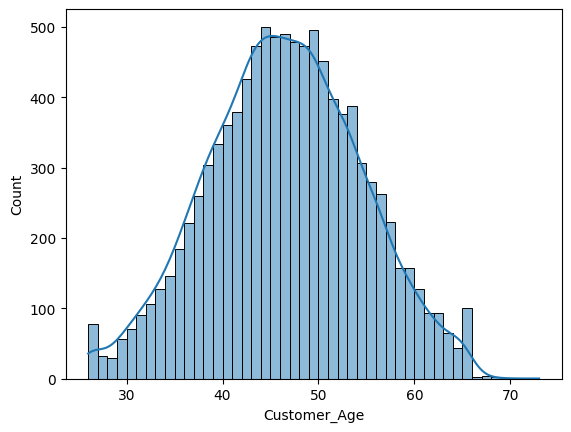

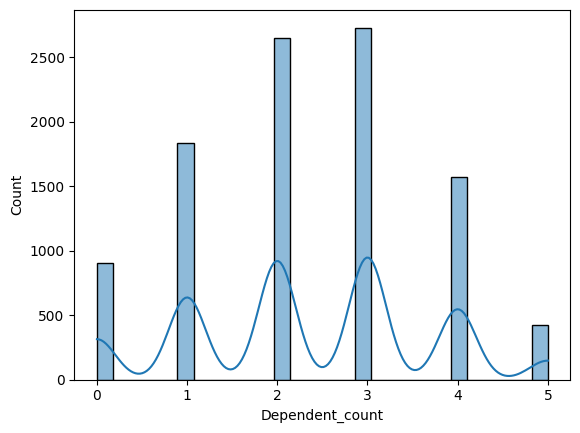

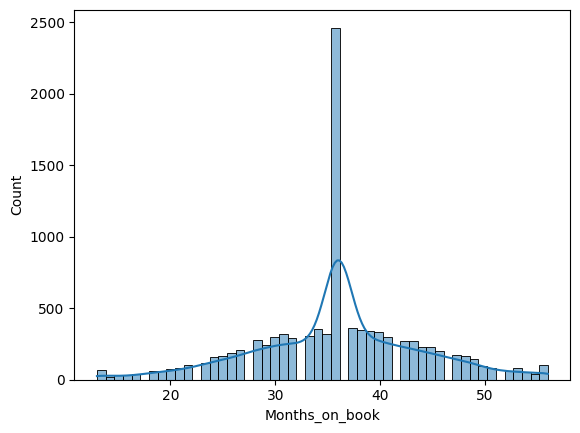

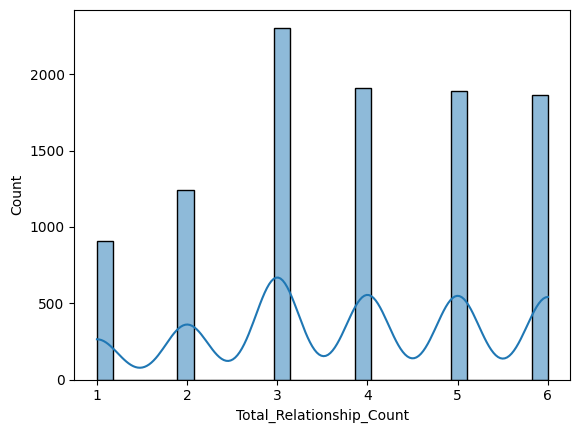

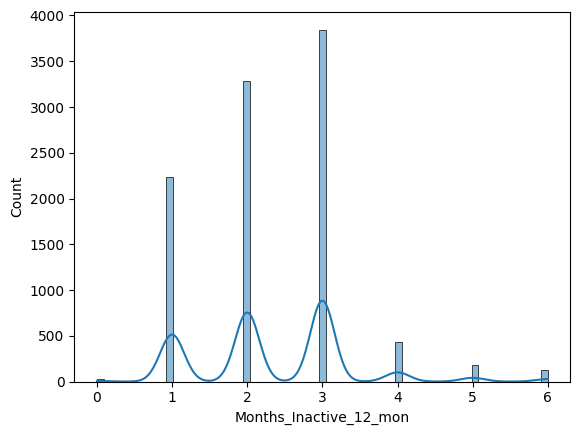

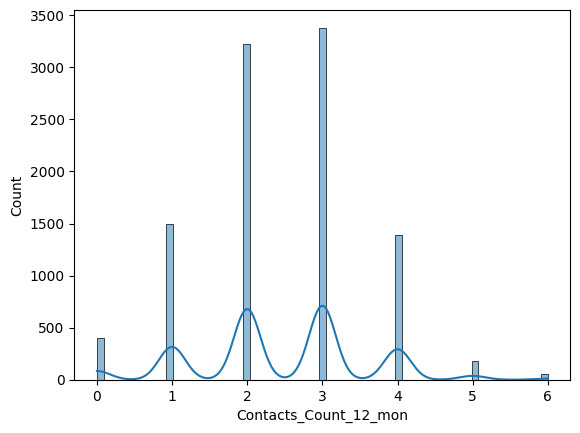

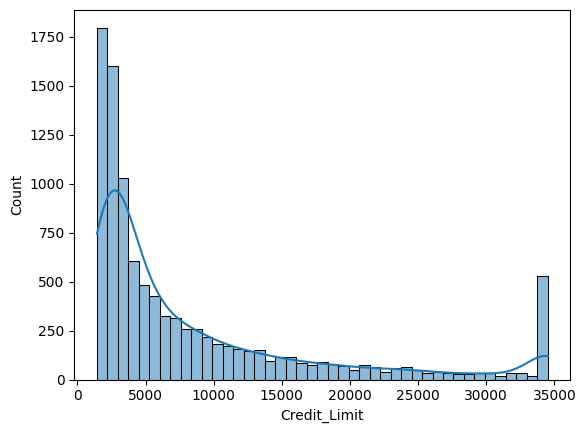

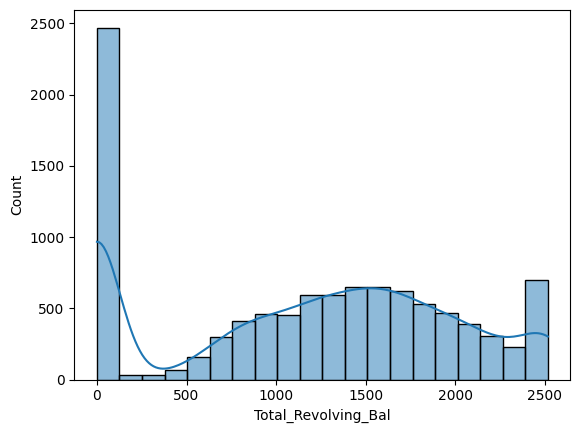

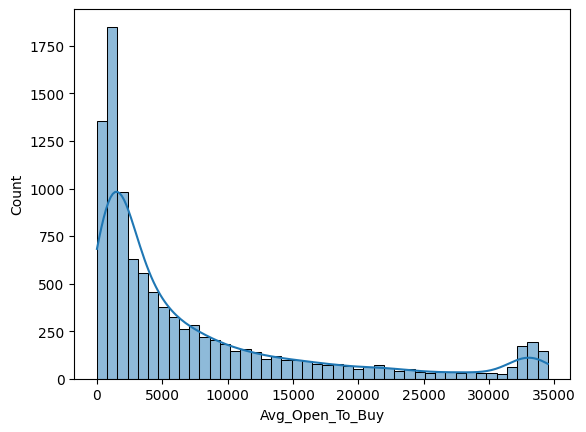

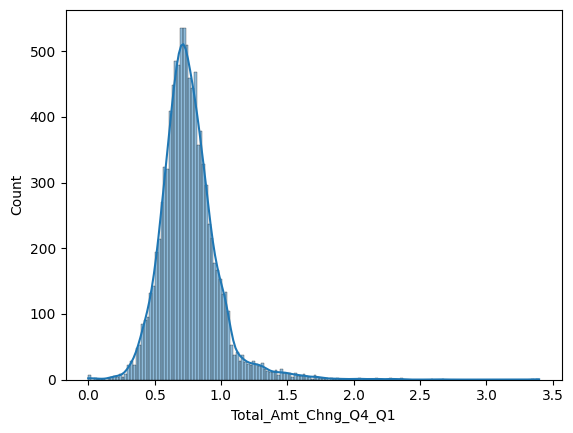

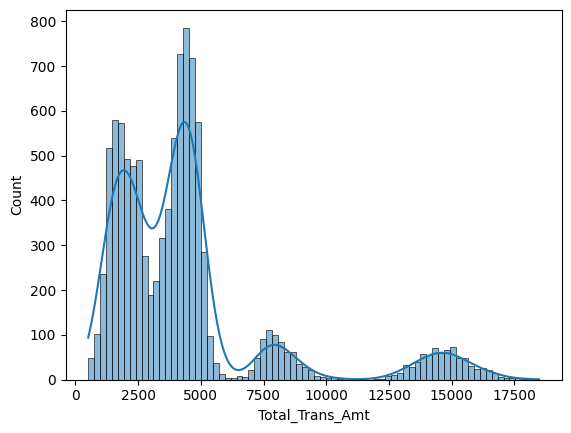

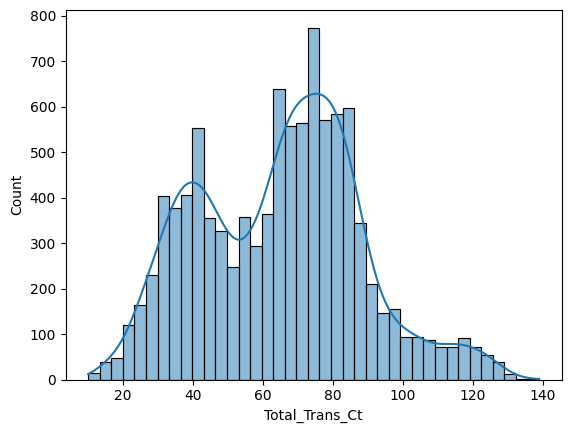

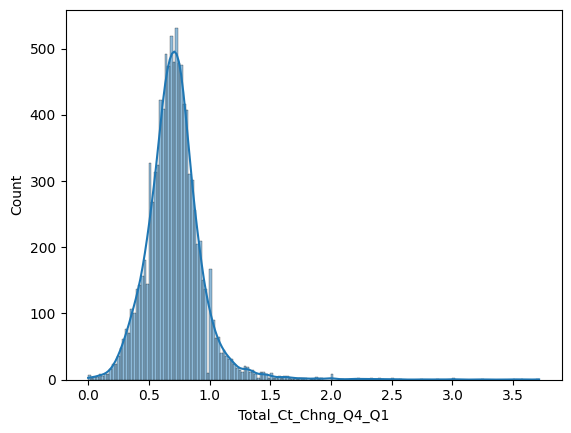

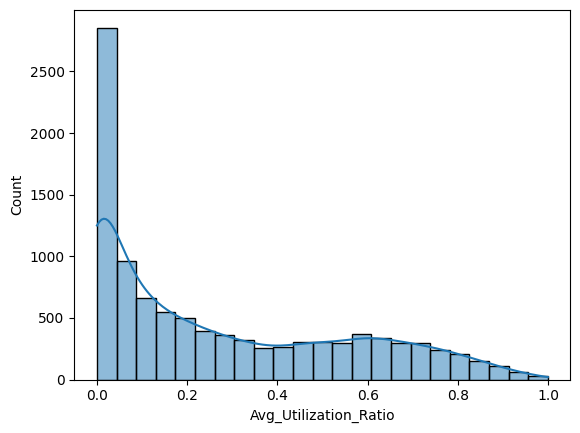

In [3]:
###### plot numerical data
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))
for i in num_data:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

จากการ plot numerical data
- ข้อมูล Customer_Age มี outlier ที่อายุมากกว่า 66
- ข้อมูล Total_Ct_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Contact_Count_12_mon จำนวน 6 ครั้งมีน้อยมากจึงพิจารณาเป็น outlier
- ข้อมูล Total_Amt_Chng_Q4_Q1 มี outlier ที่จำนวนมากกว่า 1.6
- ข้อมูล Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt และ Avg_Utilization_Ratio มีความเบ้ขวา

In [4]:
##### remove outlier
df = df.loc[df['Customer_Age'] <= 66]
df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= 1.6]
df = df.loc[df['Months_Inactive_12_mon'] < 6]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= 1.6]

##### correct skewed data
df['Credit_Limit'] = np.log10(df['Credit_Limit'])
fitted_data, fitted_lambda = stats.boxcox(df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy'] = fitted_data
df['Total_Trans_Amt'] = np.log10(df['Total_Trans_Amt'])
df['Avg_Utilization_Ratio'] = (df['Avg_Utilization_Ratio'])**(1/2)

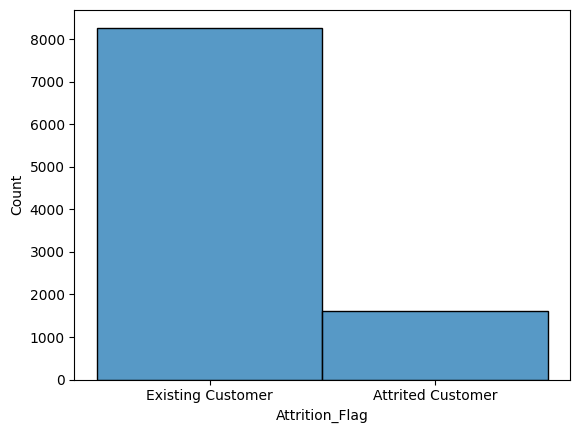

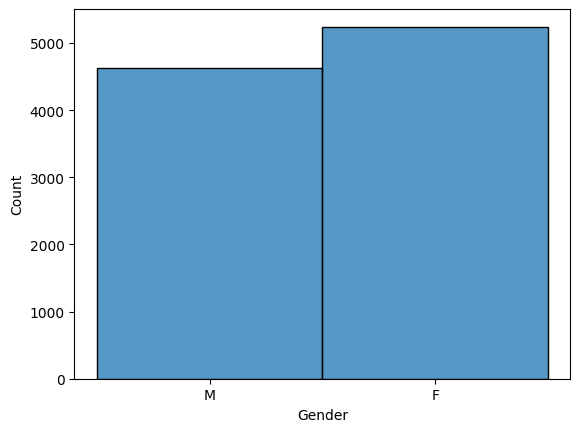

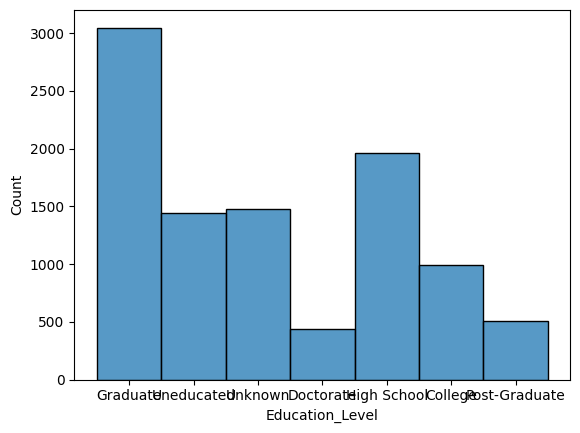

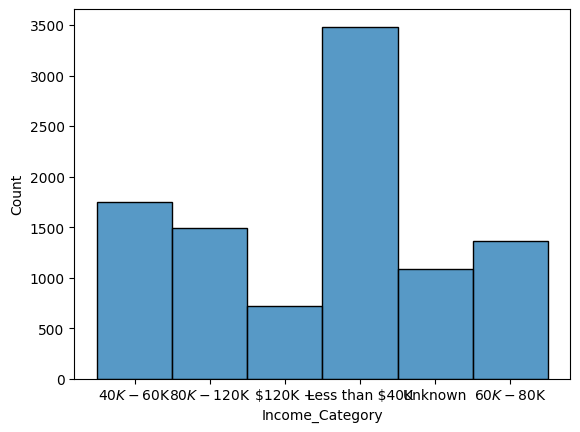

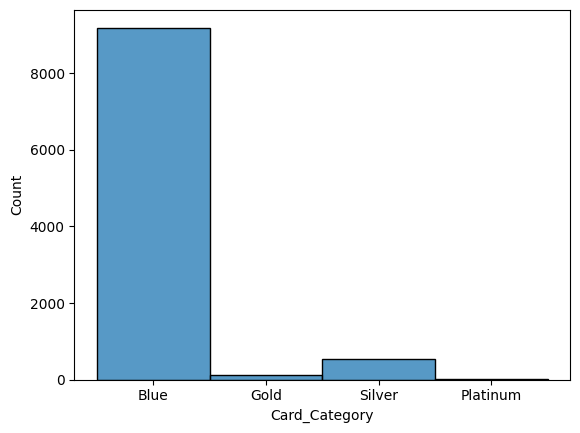

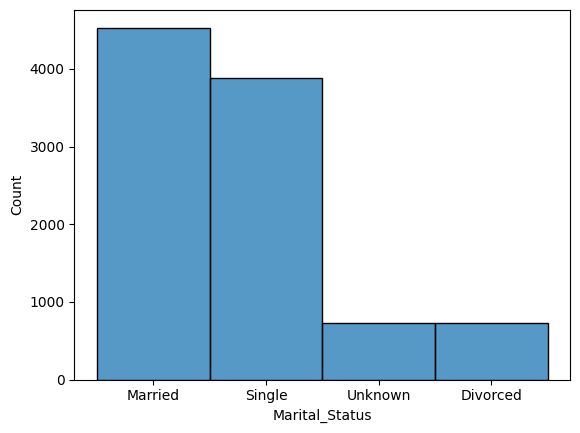

In [5]:
for i in cat_data:
    sns.histplot(data = df, x = i, kde = False)
    plt.show()

จากการ plot Categorical data
- ข้อมูล output หรือ Attrition_Flag มีความ Imbalance โดย Attrited Customer คิดเป็นเพียง 16% ของข้อมูลทั้งหมด
- ข้อมูล Card_Category ที่เป็นระดับ platinum มีจำนวนผู้ใช้งานเพียง 0.002% จากข้อมูลทั้งหมดจึงทำการลบ instance เหล่านี้ทิ้ง

In [6]:
print(df['Card_Category'].value_counts())
df = df.loc[df['Card_Category'] != 'Platinum']

Blue        9197
Silver       546
Gold         113
Platinum      20
Name: Card_Category, dtype: int64


Plot Heatmap เพื่อดูความสัมพันธุ์ระหว่าง Output กับข้อมูลอื่นๆ

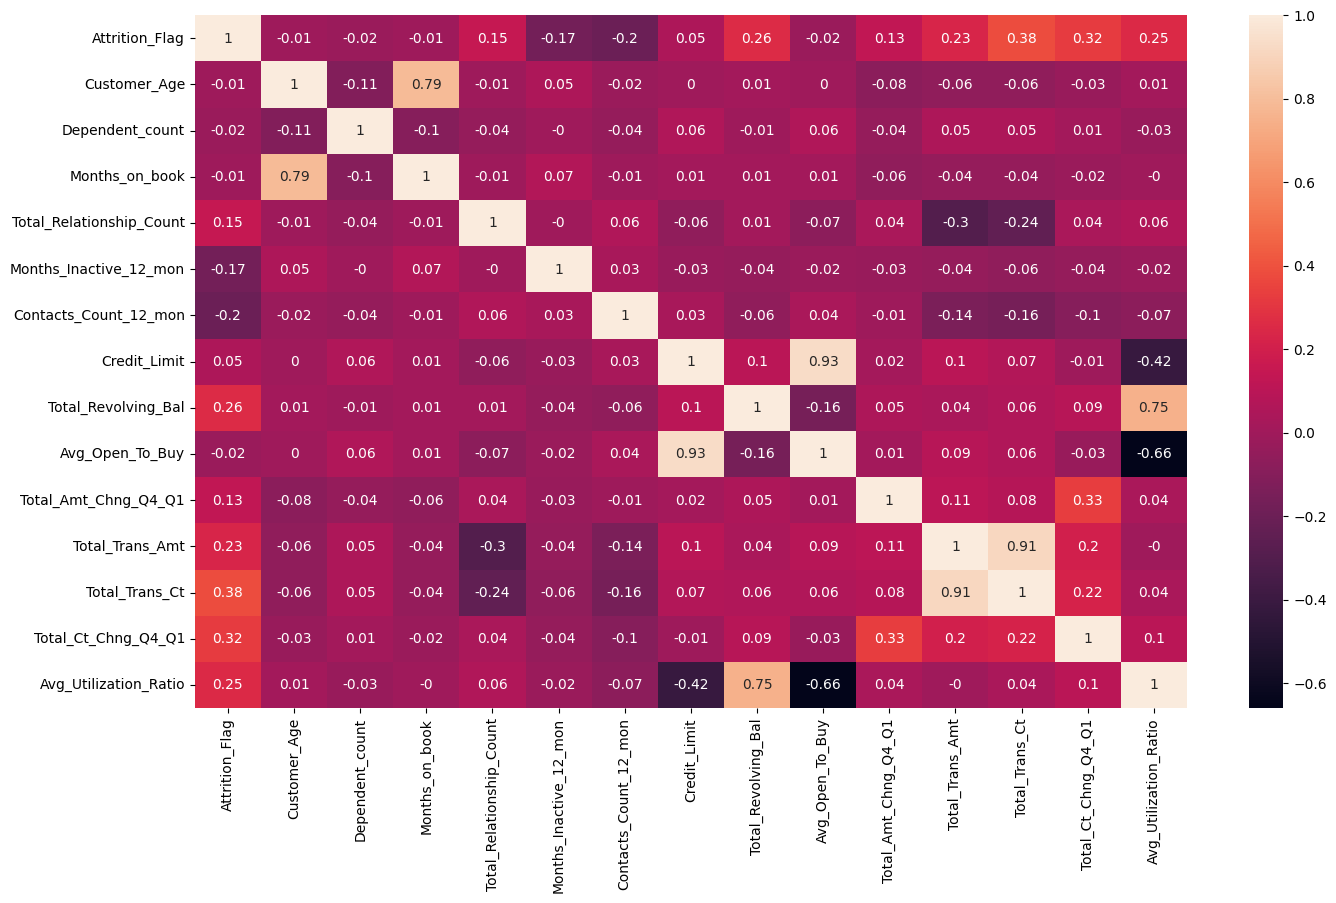

In [12]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'], [1, 0])
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

จากการ Plot Heatmap พบว่าค่าความสัมพันธุ์ของ feature กับ Output ที่มีค่ามากกว่า 0.1 เรียงจากมากไปน้อยได้ดังนี้
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Total_Relationship_Count
- Total_Amt_Chng_Q4_Q1

และความสัมพันธุ์ระหว่าง feature ที่มากกว่า 0.1 เรียงจากมากไปน้อยดังนี้
- 

In [22]:
cols = list(df.columns)
relate_feature = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1']
non_relate_feature = list(set(cols) - set(relate_feature))

for i in relate_feature:
    sns.boxplot(data = df, x = 'Attrition_Flag', y = i)
    plt.show()

จากการ Plot relate feature
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่มากที่สุดคือ 0.38 หรือข้อมูล Total_Trans_Ct พบว่าข้อมูลส่วนใหญ่มีการแบ่งกลุ่มอย่างเห็นได้ชัด
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่า 0.38 แต่มากกว่า 0.2 มีการแบ่งกลุ่มกันแต่มีบางส่วนที่ซ้อนทับกันอยู่
- ข้อมูลที่มีความสัมพันธุ์กับ output ที่น้อยกว่าหรือเท่ากับ 0.2 มีการซ้อนทับกันของข้อมูลอย่างเห็นได้ชัด

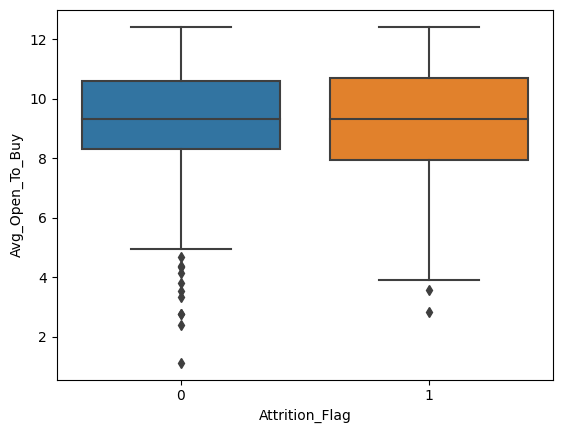

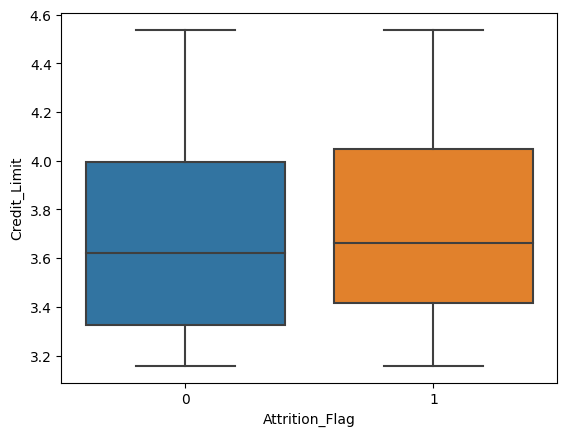

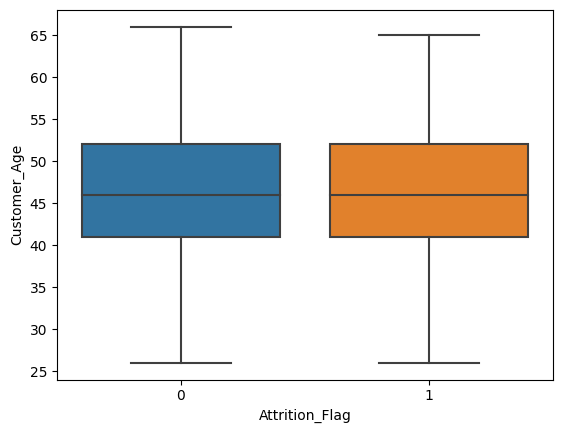

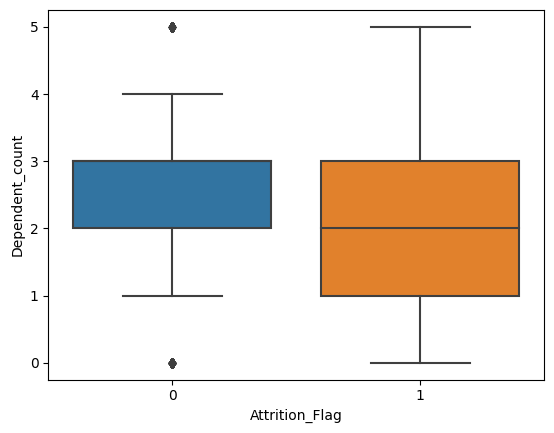

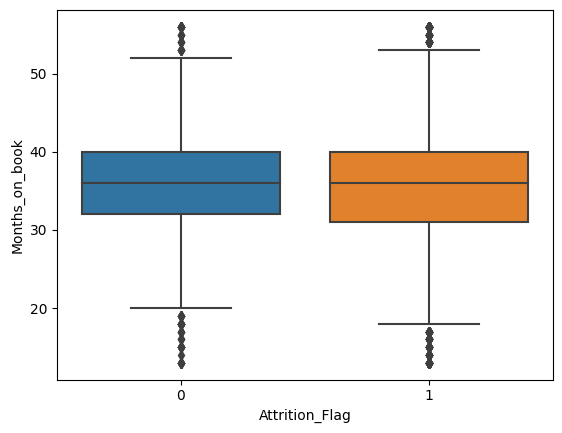

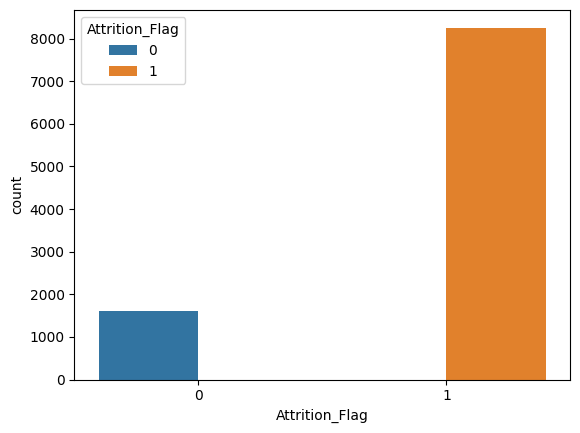

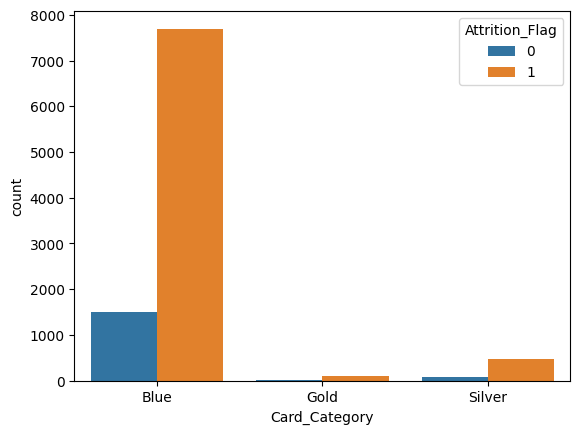

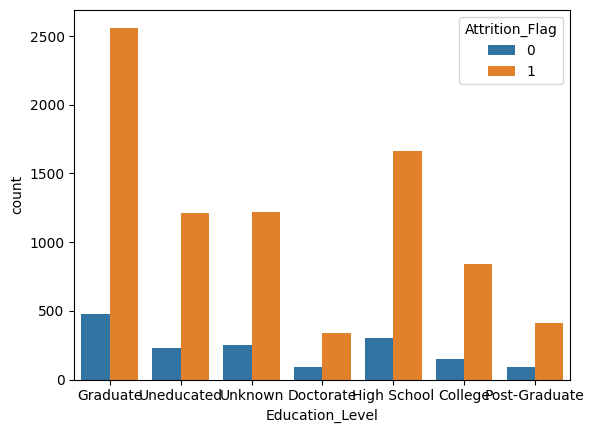

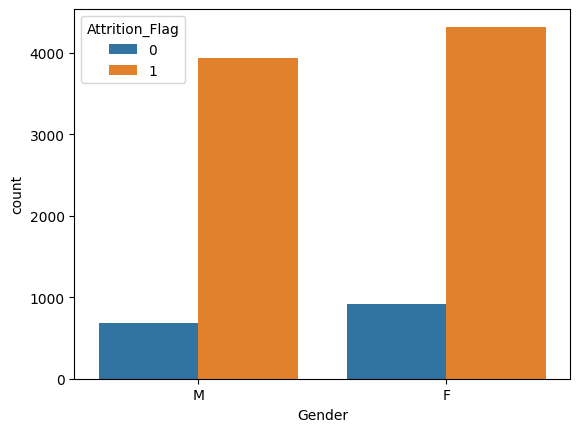

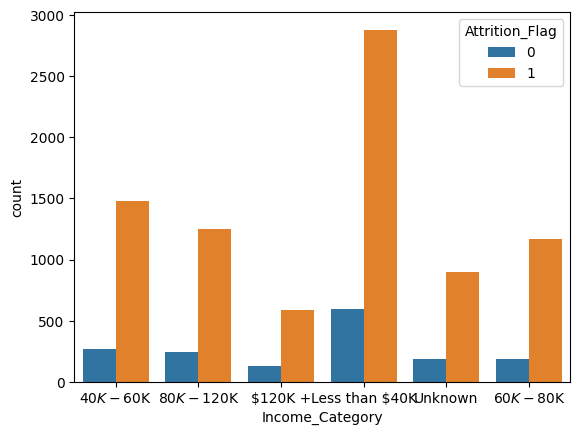

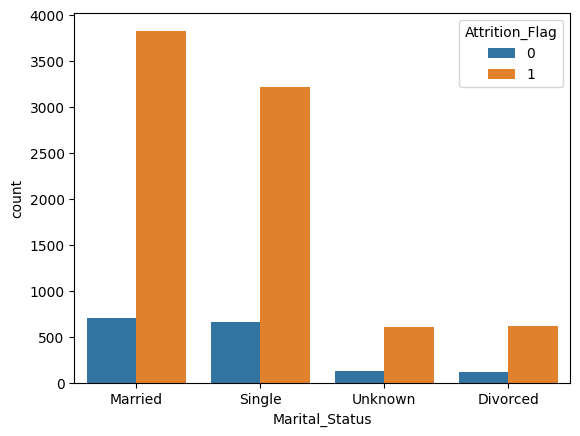

In [35]:
non_relate_num_data = np.intersect1d(num_data, non_relate_feature)
non_relate_cat_data = np.intersect1d(cat_data, non_relate_feature)

for i in non_relate_num_data:
    sns.boxplot(data = df, x = 'Attrition_Flag', y = i)
    plt.show()

for j in non_relate_cat_data:
    sns.countplot(data = df, x = j , hue = 'Attrition_Flag')
    plt.show()

จากการ Plot non-relate feature
- ข้อมูลไม่มีความสัมพันธุ์โดยตรงกับ output

##### Data Preprocessing